In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
# Declare file path and convention here

###

zip_code = '15090'

###

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/'

s2 = '/' + zip_code + '_'

# This finds the initial step, stopping point, and step size of the files in your directory

total_steps = 0

i = 0

first_file = False

final = 0

with os.scandir(s1 + zip_code) as entries:
    
    bad_strings = [zip_code, '_', '.txt']
    
    for entry in entries:
        
        file_name = entry.name
        
        for string in bad_strings:
            
            file_name = file_name.replace(string, '')
        
        if float(file_name) > final:
            
            final = float(file_name)
            
        if first_file == False:
            
            i = float(file_name)
            
            first_file = True
    
        total_steps += 1

step = round((final - i)/(total_steps - 1), 5)
        
# Create the dataframe that will hold our results

column_names = ['Ovito Range', 'Buildings per Cluster']

final_frame = pd.DataFrame(columns = column_names)

# The loop that does everything yeet

while i <= final:
    
    # I could not figure out how to intelligently round the numbers so make sure to check this before running!!
    
    i = round(i, 5)
    
    openpath = s1 + zip_code + s2 + str(i) + '.txt'
    
    with open(openpath) as file:
    
        data = pd.read_csv(file, sep = ',', names = ['Size'], skiprows = [0])
    
    # data.index = data.index + 1
    
    # data = data.reset_index()
    
    total_buildings = data['Size'].sum()
    
    total_clusters = data.index.max() + 1
    
    buildings_per_cluster = total_buildings/total_clusters
    
    temp_df = pd.DataFrame([[i, buildings_per_cluster]], columns = column_names)
    
    final_frame = final_frame.append(temp_df, ignore_index = True)
    
    i += step
    
final_frame

,Ovito Range,Buildings per Cluster
0,0.010,1.003948
1,0.011,1.008793
2,0.012,1.014340
3,0.013,1.019948
4,0.014,1.027074
...,...,...
159,0.169,30.745098
160,0.170,31.049505
161,0.171,31.676768
162,0.172,32.109215


Text(0.5, 1.0, 'Buildings per Cluster vs Ovito Range for 15090')

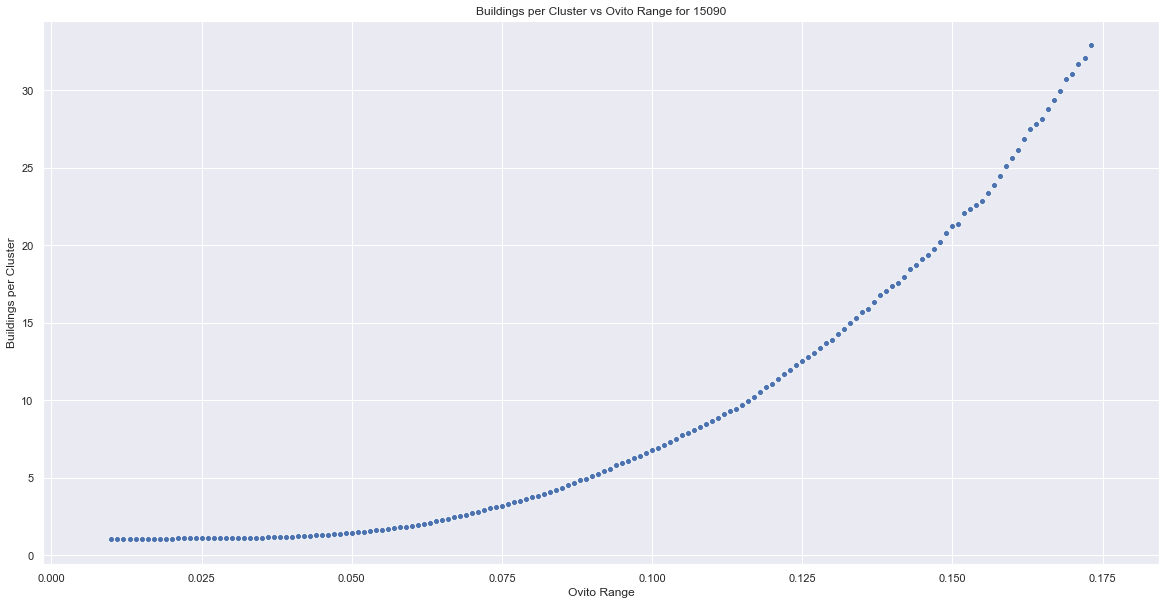

In [14]:
sns.set(rc={'figure.figsize':(20, 10)})

zip_dist = sns.scatterplot(x = final_frame['Ovito Range'], y = final_frame['Buildings per Cluster'])

zip_dist.set_title('Buildings per Cluster vs Ovito Range for ' + str(zip_code))